# Customer Analysis🙆🏻‍♀️

### PLAN: Outline scope of this project 




1. **GOAL** : Segment customers and understand each purchasing preference using some metrics. 

2. **STRATEGY** : Development commercial recommendations for profit.

### Analyze: Structure of EDA

1. Examine data – look for inconsistencies, missing data across the data set, outliers, correctly identified category items, numeric data across all tables.

2. Data analysis and customer segments – Explore the data, create charts and graphs as well as noting any interesting trends and/or insights found.

3. Deep dive into customer segments – define your recommendation from your insights, determine which segments we should be targeting.

### 1. Examine data 
#### 1.1 Load Data

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
#import dataset1

df_behavir = pd.read_csv("QVI_purchase_behaviour.csv")
df_behavir.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [5]:
#import dataset2

df_transaction = pd.read_csv("QVI_transaction_data.csv")
df_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


#### 1.2 Check Data Quality

In [6]:
# Examine transaction data
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


There is no missing values

In [7]:
# check data format
df_transaction.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

DATE: Change date format

In [8]:
# errors in date type

from datetime import date, timedelta

new_date = []
start = date(1899, 12, 30)

for date in df_transaction['DATE']:
    delta = timedelta(date)
    new_date.append(start + delta)

df_transaction['DATE'] = pd.to_datetime(pd.Series(new_date))
df_transaction.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [9]:
# check outlier
df_transaction.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


We could see the ourliers in transaction dataset: the max value in the dataset.

In [10]:
# check outliers-- 200 PROD_QTY might be the case

df_transaction[df_transaction['PROD_QTY'] == 200]


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [11]:

df_behavir[df_behavir['LYLTY_CARD_NBR'] == 226000]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
59694,226000,OLDER FAMILIES,Premium


This customer might buy products for commerical purposes thereby removing it

In [12]:
# dd = df_transaction[df_transaction.LYLTY_CARD_NBR == 226000].index

# df_transaction.drop(dd, inplace=True)

#df_transaction.drop(df_transaction[df_transaction.LYLTY_CARD_NBR == 226000].index)


df_transaction = df_transaction[df_transaction.LYLTY_CARD_NBR != 226000]
df_transaction.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
std,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [13]:
# check behavir data
df_behavir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
df_behavir.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


#### 1.3 check values

In [15]:
df_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [16]:
# create new brand column
df_transaction['BRAND_NAME'] = df_transaction['PROD_NAME'].str.replace(r'[0-9]+(G)','g').str.split(" ",expand=True)[0]
df_transaction.BRAND_NAME.unique()

/var/folders/qc/zvz1knc173n7lpbcfzncj0_h0000gn/T/ipykernel_2341/3487878711.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_transaction['BRAND_NAME'] = df_transaction['PROD_NAME'].str.replace(r'[0-9]+(G)','g').str.split(" ",expand=True)[0]


array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos',
       'Cheetos', 'Snbts', 'Sunbites'], dtype=object)

In [17]:
def rename_brand(line):
    brand = line["BRAND_NAME"]
    
    if brand  == "Red":
        return "red"
    elif brand  == "Natural" or brand == "NCC":
        return "Natural Chip Co"
    elif brand == "Dorito":
        return "Doritos"
    elif brand == "Smith":
        return "Smiths"
    elif brand == "Snbts":
        return "Sunbites"
    elif brand == "WW":
        return "Woolworths"
    elif brand == "GrnWves" or brand == "Grain":
        return "Grain Waves"
    elif brand == "Infzns":
        return "Infuzions"
    else:
        return brand
df_transaction.BRAND_NAME = df_transaction.apply(lambda x: rename_brand(x), axis = 1)

In [18]:
df_transaction.BRAND_NAME.unique()

array(['Natural Chip Co', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain Waves',
       'Doritos', 'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'red', 'Pringles', 'Tyrrells', 'Cobs', 'French',
       'RRD', 'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

In [19]:
# create new pack size column
df_transaction['PACK_SIZE'] = df_transaction['PROD_NAME'].str.extract(r'([0-9]+[gG])')[0].str.replace("g","").str.replace("G","")
df_transaction['PACK_SIZE'] = pd.to_numeric(df_transaction['PACK_SIZE'], errors='coerce')

In [20]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264834 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264834 non-null  datetime64[ns]
 1   STORE_NBR       264834 non-null  int64         
 2   LYLTY_CARD_NBR  264834 non-null  int64         
 3   TXN_ID          264834 non-null  int64         
 4   PROD_NBR        264834 non-null  int64         
 5   PROD_NAME       264834 non-null  object        
 6   PROD_QTY        264834 non-null  int64         
 7   TOT_SALES       264834 non-null  float64       
 8   BRAND_NAME      264834 non-null  object        
 9   PACK_SIZE       264834 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 22.2+ MB


In [21]:
#check whether all the product is chip
pro_words = df_transaction["PROD_NAME"].str.replace(r'([0-9]+[gG])','').str.replace(r'[^\w]',' ').str.split()
word_counts = {}

def count_word(lines):
    for word in lines:
        if word not in word_counts:
            word_counts[word] = 1
        else:
            word_counts[word] += 1 
            
pro_words.apply(lambda line: count_word(line))

prod_list = pd.Series(word_counts).sort_values(ascending = False).reset_index()
prod_list = prod_list.rename(columns={'index': 'Product', 0: 'Count'})

/var/folders/qc/zvz1knc173n7lpbcfzncj0_h0000gn/T/ipykernel_2341/244484164.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  pro_words = df_transaction["PROD_NAME"].str.replace(r'([0-9]+[gG])','').str.replace(r'[^\w]',' ').str.split()


In [22]:
pd.set_option('display.max_rows', 500)
print(prod_list)

             Product  Count
0              Chips  49770
1             Kettle  41288
2             Smiths  28860
3               Salt  27976
4             Cheese  27890
5           Pringles  25102
6            Doritos  24962
7            Crinkle  23960
8               Corn  22061
9           Original  21560
10               Cut  20754
11              Chip  18645
12           Chicken  18577
13             Salsa  18094
14             Cream  16926
15            Chilli  15390
16               Sea  14145
17             Thins  14075
18              Sour  13882
19            Crisps  12607
20           Vinegar  12402
21               RRD  11894
22             Sweet  11060
23         Infuzions  11057
24           Supreme  10961
25            Chives  10951
26                WW  10320
27              Cobs   9693
28              Popd   9693
29          Tortilla   9580
30          Tostitos   9471
31          Twisties   9454
32               BBQ   9434
33        Sensations   9429
34              Lime

In [23]:

# df_transaction = df_transaction[~df_transaction.PROD_NAME.str.contains("Salsa")]
#df_transaction[df_transaction.PROD_NAME.str.contains('^(?=.*\bSalsa\b)(?=.*\bDip\b).*$', regex=True)]
CheckChip = df_transaction[df_transaction.PROD_NAME.str.contains('Salsa' ) & df_transaction.PROD_NAME.str.contains('Dip' )]

CheckChip 


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,Old,300
25,2019-05-15,39,39144,35506,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,Old,300
71,2018-08-15,94,94233,93956,65,Old El Paso Salsa Dip Chnky Tom Ht300g,1,5.1,Old,300
87,2018-08-15,116,116184,120270,59,Old El Paso Salsa Dip Tomato Med 300g,1,5.1,Old,300
114,2018-08-16,157,157185,159562,59,Old El Paso Salsa Dip Tomato Med 300g,2,10.2,Old,300
...,...,...,...,...,...,...,...,...,...,...
264594,2019-03-15,261,261323,261068,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,Old,300
264607,2018-11-07,262,262061,261665,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,Old,300
264615,2018-08-23,262,262084,261793,57,Old El Paso Salsa Dip Tomato Mild 300g,2,10.2,Old,300
264628,2019-01-01,264,264165,262926,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,Old,300


There are some entries that are Salsa Dip rather than chip, thus removing them

In [24]:
df_transaction = df_transaction[~(df_transaction.PROD_NAME.str.contains('Salsa' ) & df_transaction.PROD_NAME.str.contains('Dip' ))]
df_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Co,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150


In [25]:
#check the DATE values

#check whether there is missing days

date_range = pd.date_range(start=df_transaction["DATE"].min(), 
                           end=df_transaction["DATE"].max(), freq='D')
df_date = pd.DataFrame(date_range, columns=['DATE'])
df_date_check = df_date.merge(df_transaction, how='left', on='DATE')
df_date_check[df_date_check.isnull().any(axis=1)]



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE
124723,2018-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


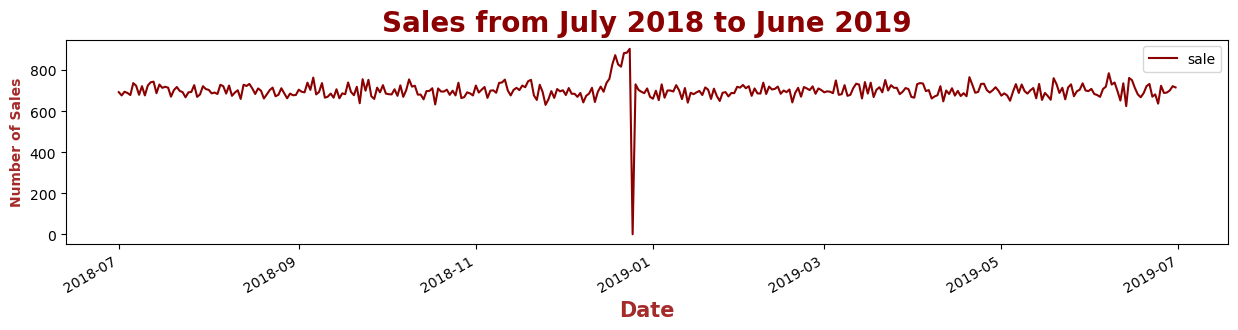

In [26]:
trans_date = df_date_check['DATE'].value_counts()

df_trans_date = pd.DataFrame(trans_date)
df_trans_date_reset = df_trans_date.reset_index()
df_trans_date_reset.columns = ['date', 'sale']
ax = df_trans_date_reset.plot('date' , 'sale',figsize=(15,3), color='darkred')
plt.title("Sales from July 2018 to June 2019", fontsize=20, fontweight='bold', color='darkred')
plt.xlabel("Date", fontsize=15, fontweight='bold', color='brown')
plt.ylabel("Number of Sales", fontsize=10, fontweight='bold', color='brown')
plt.legend()
plt.show()

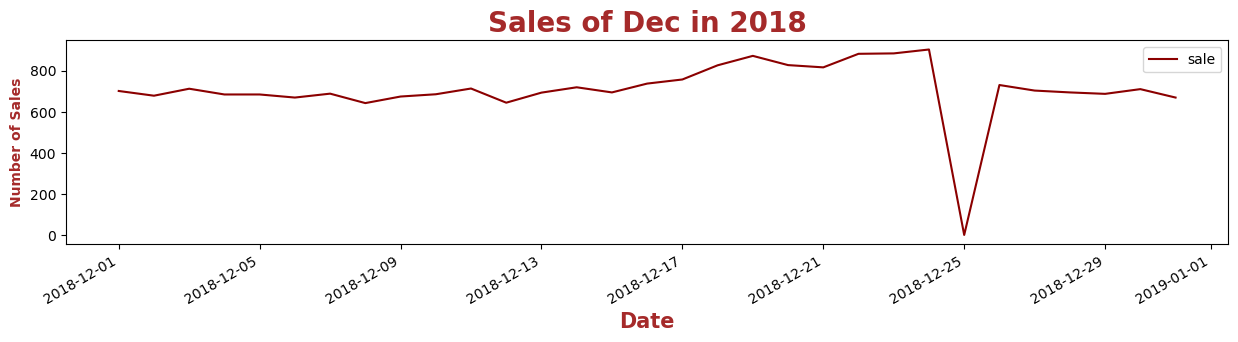

In [27]:
df_trans_dec = df_trans_date_reset[(df_trans_date_reset['date'] >= '2018-12-01') & (df_trans_date_reset['date'] <= '2018-12-31')]
ax = df_trans_dec.plot('date' , 'sale',figsize=(15,3), color='darkred')
plt.title("Sales of Dec in 2018", fontsize=20, fontweight='bold', color='brown')
plt.xlabel("Date", fontsize=15, fontweight='bold', color='brown')
plt.ylabel("Number of Sales", fontsize=10, fontweight='bold', color='brown')
plt.legend()
plt.show()


There is a day has no sales, it is due to Chrismas Holiday. 

In [28]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255510 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            255510 non-null  datetime64[ns]
 1   STORE_NBR       255510 non-null  int64         
 2   LYLTY_CARD_NBR  255510 non-null  int64         
 3   TXN_ID          255510 non-null  int64         
 4   PROD_NBR        255510 non-null  int64         
 5   PROD_NAME       255510 non-null  object        
 6   PROD_QTY        255510 non-null  int64         
 7   TOT_SALES       255510 non-null  float64       
 8   BRAND_NAME      255510 non-null  object        
 9   PACK_SIZE       255510 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 21.4+ MB


In [29]:
df_transaction.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,255510.000000,2.555100e+05,2.555100e+05,255510.000000,255510.000000,255510.000000,255510.000000
mean,135.069003,1.355378e+05,1.351484e+05,56.446139,1.905675,7.210402,178.135016
std,76.751267,8.054938e+04,7.810302e+04,33.405683,0.343691,2.507754,61.366560
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,70.000000,7.003025e+04,6.766825e+04,28.000000,2.000000,5.400000,150.000000
50%,130.000000,1.303540e+05,1.351225e+05,53.000000,2.000000,7.400000,170.000000
75%,203.000000,2.030778e+05,2.026278e+05,86.000000,2.000000,8.800000,175.000000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,380.000000


In [30]:
df_behavir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [31]:
#merge two dataset

df_all = df_transaction.merge(df_behavir, how='left', on='LYLTY_CARD_NBR')
df_all.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Co,175,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150,MIDAGE SINGLES/COUPLES,Budget


---------------------------------------------------------------------------------------------------------

### 2. Data analysis and customer segments
#### 2.1  Analysis: Who spends the most on chips?¶

In [32]:
#### Examining the values of lifestage and premium_customer
df_all.groupby('LIFESTAGE')['LIFESTAGE'].count()


LIFESTAGE
MIDAGE SINGLES/COUPLES    24195
NEW FAMILIES               6674
OLDER FAMILIES            47005
OLDER SINGLES/COUPLES     52534
RETIREES                  47924
YOUNG FAMILIES            42125
YOUNG SINGLES/COUPLES     35053
Name: LIFESTAGE, dtype: int64

In [33]:
df_all.groupby('PREMIUM_CUSTOMER')['PREMIUM_CUSTOMER'].count()

PREMIUM_CUSTOMER
Budget        89954
Mainstream    98263
Premium       67293
Name: PREMIUM_CUSTOMER, dtype: int64

In [34]:
#### Total sales by LIFESTAGE and PREMIUM_CUSTOMER

customer_sales = pd.DataFrame(df_all.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])["TOT_SALES"].sum()).reset_index()
customer_sales
#pd.crosstab(customer_sales['LIFESTAGE'],customer_sales['PREMIUM_CUSTOMER'])
#pivot_df = customer_sales.pivot(index = 'LIFESTAGE', columns = 'PREMIUM_CUSTOMER', values='TOT_SALES')
#pivot_customer.reset_index()
#pivot_df.reset_index(inplace=True)
#pivot_df.columns = ['LIFESTAGE'] + ['PREMIUM_CUSTOMER_' + col for col in pivot_df.columns[1:]]
#customer_sales.reset_index().dtypes
#customer_sales.sort_values(ascending = True, by = )



,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,34122.50
1,MIDAGE SINGLES/COUPLES,Mainstream,85928.25
2,MIDAGE SINGLES/COUPLES,Premium,55836.75
3,NEW FAMILIES,Budget,20898.25
4,NEW FAMILIES,Mainstream,16208.10
5,NEW FAMILIES,Premium,10955.60
6,OLDER FAMILIES,Budget,160794.85
7,OLDER FAMILIES,Mainstream,98738.25
8,OLDER FAMILIES,Premium,77129.20
9,OLDER SINGLES/COUPLES,Budget,130190.80


In [35]:
#pivot_df = customer_sales.pivot_table(index = 'LIFESTAGE', columns = 'PREMIUM_CUSTOMER', values='TOT_SALES')
pivot_df = pd.crosstab(index = customer_sales['LIFESTAGE'], columns = customer_sales['PREMIUM_CUSTOMER'], values=customer_sales['TOT_SALES'],aggfunc=sum,margins = True,margins_name= "Total")
pivot_df = pd.DataFrame(pivot_df)
pivot_df

PREMIUM_CUSTOMER,Budget,Mainstream,Premium,Total
LIFESTAGE,,,,
MIDAGE SINGLES/COUPLES,34122.50,85928.25,55836.75,175887.50
NEW FAMILIES,20898.25,16208.10,10955.60,48061.95
OLDER FAMILIES,160794.85,98738.25,77129.20,336662.30
OLDER SINGLES/COUPLES,130190.80,127391.10,125852.45,383434.35
RETIREES,107644.90,148210.65,92785.75,348641.30
YOUNG FAMILIES,132710.75,88678.15,80292.30,301681.20
YOUNG SINGLES/COUPLES,58550.80,149441.20,39969.30,247961.30
Total,644912.85,714595.70,482821.35,1842329.90


In [37]:
pivot_df_per = pivot_df.apply(lambda r: r/pivot_df['Total'][-1].round(2), axis=1).drop('Total', axis=1).drop('Total')
pivot_df_per

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,0.018521,0.046641,0.030308
NEW FAMILIES,0.011343,0.008798,0.005947
OLDER FAMILIES,0.087278,0.053594,0.041865
OLDER SINGLES/COUPLES,0.070666,0.069147,0.068312
RETIREES,0.058429,0.080447,0.050363
YOUNG FAMILIES,0.072034,0.048134,0.043582
YOUNG SINGLES/COUPLES,0.031781,0.081115,0.021695


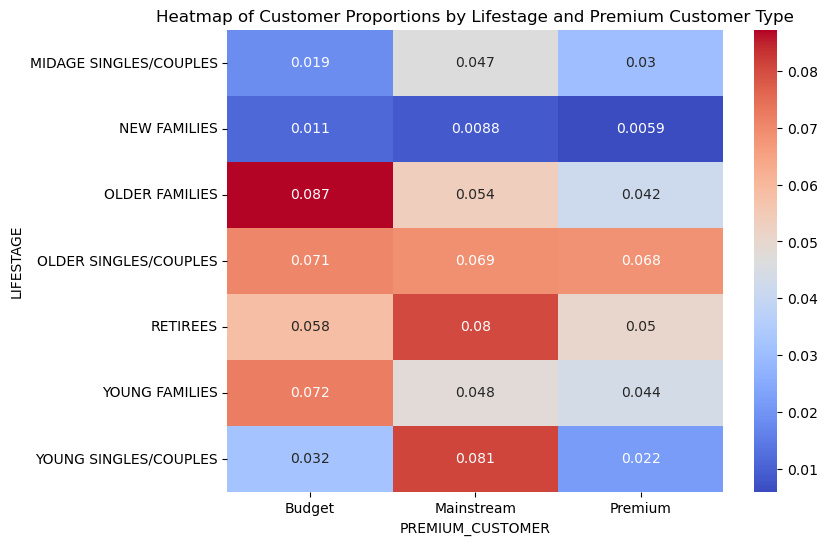

In [55]:
# https://medium.com/geekculture/the-power-of-crosstab-function-in-pandas-for-data-analysis-and-visualization-6c085c269fcd
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df_per, annot=True, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Customer Proportions by Lifestage and Premium Customer Type')
plt.show()

In [56]:
# ##plot: sales and customer categories 
# ##plot: use color 
# import pandas as pd
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(4, 8))
# cax = ax.matshow(pivot_df_per, cmap=plt.cm.Blues)
# fig.colorbar(cax)

# # Set the x and y-axis labels
# ax.set_xticklabels([''] + pivot_df_per.columns.tolist())
# ax.set_yticklabels([''] + pivot_df_per.index.tolist())


# # Rotate x-axis labels
# ax.xaxis.set_ticks_position('bottom')
# plt.xticks(rotation=60)

# # Add a color legend
# for i in range(len(pivot_df_per.index)):
#     for j in range(len(pivot_df_per.columns)):
#         value = pivot_df_per.iloc[i, j]
#         text = ax.text(j, i, f'{value:.2%}', ha='center', va='center', color='w')
# # Set plot title
# plt.title("Proportion of Sales")

# # Show the plot
# plt.show()

#### Summary: sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees

### How many customers are in each segment?

In [101]:
customer_num = pd.DataFrame(df_all.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).value_counts()).reset_index()
customer_num = customer_num.rename(columns = {0 : 'TOT_NUM'})

pivot_num_df = pd.crosstab(index = customer_num['LIFESTAGE'], columns = customer_num['PREMIUM_CUSTOMER'], values=customer_num['TOT_NUM'], aggfunc=sum)
#pivot_num_df = pd.DataFrame(pivot_num_df)
pivot_num_df

#pivot_num_df_per = pivot_num_df.apply(lambda r: r/pivot_num_df['Total'][-1].round(2), axis=1).drop('Total', axis=1).drop('Total')
#pivot_num_df_per

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,4691,11095,7612
NEW FAMILIES,2824,2185,1488
OLDER FAMILIES,21514,13241,10403
OLDER SINGLES/COUPLES,17172,17061,16560
RETIREES,14225,19970,12236
YOUNG FAMILIES,17763,11947,10784
YOUNG SINGLES/COUPLES,8573,19544,5852


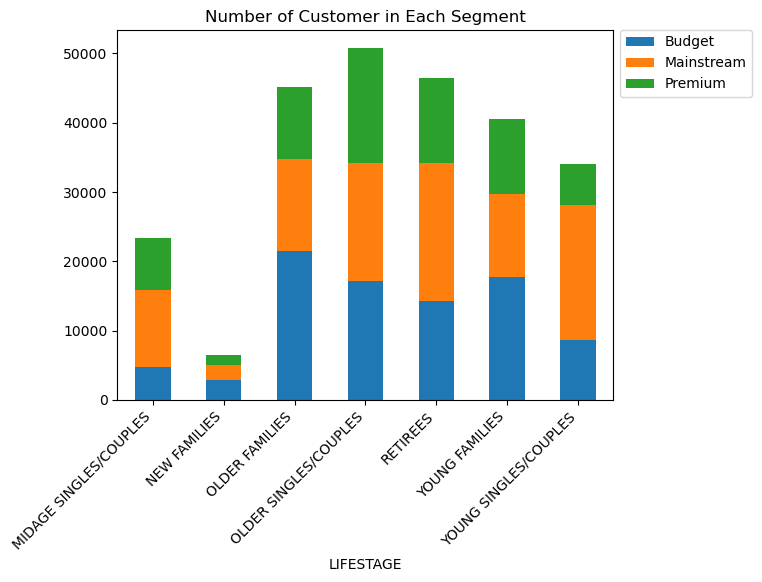

In [102]:

pl = pivot_num_df.plot(kind="bar", stacked=True, rot=0)
pl.legend( bbox_to_anchor=(1, 1.02), 
         loc='upper left')
pl.set_xticklabels(pl.get_xticklabels(), rotation=45, horizontalalignment='right')
pl.set_title('Number of Customer in Each Segment')
# for p in pl.patches:
#     width, height = p.get_width(), p.get_height()
#     x, y = p.get_xy()
#     pl.annotate(f'{height:.2%}', (x + width / 2, y + height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [62]:
# import pandas as pd
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(4, 8))
# cax = ax.matshow(pivot_num_df_per, cmap=plt.cm.Blues)
# fig.colorbar(cax)

# # Set the x and y-axis labels
# ax.set_xticklabels([''] + pivot_num_df_per.columns.tolist())
# ax.set_yticklabels([''] + pivot_num_df_per.index.tolist())


# # Rotate x-axis labels
# ax.xaxis.set_ticks_position('bottom')
# plt.xticks(rotation=60)

# # Add a color legend
# for i in range(len(pivot_num_df_per.index)):
#     for j in range(len(pivot_num_df_per.columns)):
#         value = pivot_num_df_per.iloc[i, j]
#         text = ax.text(j, i, f'{value:.2%}', ha='center', va='center', color='w')
# # Set plot title
# plt.title("Number of Customer")

# # Show the plot
# plt.show()

#### Summary: there are more Budget - older families, Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments.


### How many chips are bought per customer by segment?


In [63]:
df_all.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Co,175,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150,MIDAGE SINGLES/COUPLES,Budget


In [64]:
customer_per_unit = pd.DataFrame(df_all.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).apply( lambda x:x['PROD_QTY'].sum()/x['LYLTY_CARD_NBR'].nunique())).reset_index()
customer_per_unit = customer_per_unit .rename(columns = {0 : 'PER_UNIT'})

customer_per_unit = pd.crosstab(index = customer_per_unit['LIFESTAGE'], columns = customer_per_unit['PREMIUM_CUSTOMER'], values = customer_per_unit['PER_UNIT'], aggfunc=sum)
customer_per_unit = pd.DataFrame(customer_per_unit)
customer_per_unit


PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,6.160989,6.572854,6.244075
NEW FAMILIES,4.880909,4.953571,4.908778
OLDER FAMILIES,9.390433,9.555912,9.360124
OLDER SINGLES/COUPLES,6.935814,6.910503,6.941463
RETIREES,6.264992,6.082230,6.240156
YOUNG FAMILIES,8.997487,8.970392,8.948803
YOUNG SINGLES/COUPLES,4.327175,4.654305,4.328482


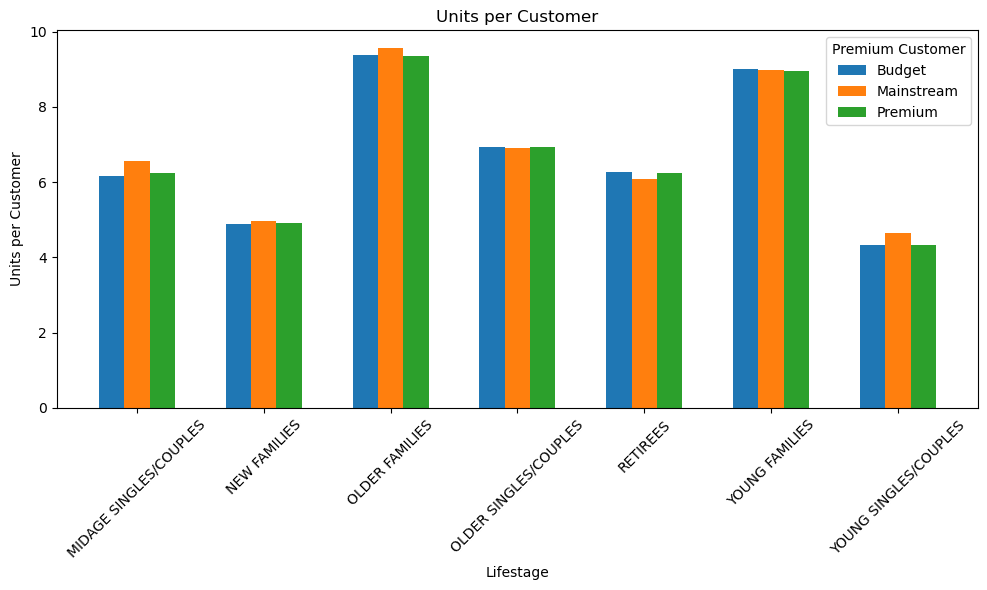

In [65]:
##doggy plot
import numpy as np
import matplotlib.pyplot as plt

lifestages = customer_per_unit.index
premium_customers = customer_per_unit.columns
unit_prices = customer_per_unit.values.T

bar_width = 0.2
x = np.arange(len(lifestages))

fig, ax = plt.subplots(figsize=(10, 6))


for i, premium_customer in enumerate(premium_customers):
    ax.bar(x + i * bar_width, unit_prices[i], bar_width, label=premium_customer)

ax.set_xlabel('Lifestage')
ax.set_ylabel('Units per Customer')
ax.set_title('Units per Customer')
ax.set_xticks(x + bar_width * (len(premium_customers) - 1) / 2)
ax.set_xticklabels(lifestages, rotation=45)
ax.legend(title='Premium Customer')

plt.tight_layout()
plt.show()

#### Summary: older families and young families in general buy more chips per customer



### What's the average chip price by customer segment?

In [67]:
customer_per_price = pd.DataFrame(df_all.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).apply( lambda x:x['TOT_SALES'].sum()/x['PROD_QTY'].sum()).reset_index())
customer_per_price = customer_per_price.rename(columns = {0 : 'PER_PRICE'})

customer_per_price = pd.crosstab(index = customer_per_price['LIFESTAGE'], columns = customer_per_price['PREMIUM_CUSTOMER'], values = customer_per_price['PER_PRICE'], aggfunc=sum)
customer_per_price = pd.DataFrame(customer_per_price)
customer_per_price

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,3.699718,3.951996,3.718236
NEW FAMILIES,3.892392,3.895242,3.841374
OLDER FAMILIES,3.689563,3.679732,3.659054
OLDER SINGLES/COUPLES,3.837041,3.766739,3.845289
RETIREES,3.888203,3.795018,3.877220
YOUNG FAMILIES,3.705969,3.658641,3.704545
YOUNG SINGLES/COUPLES,3.622745,4.036224,3.632582


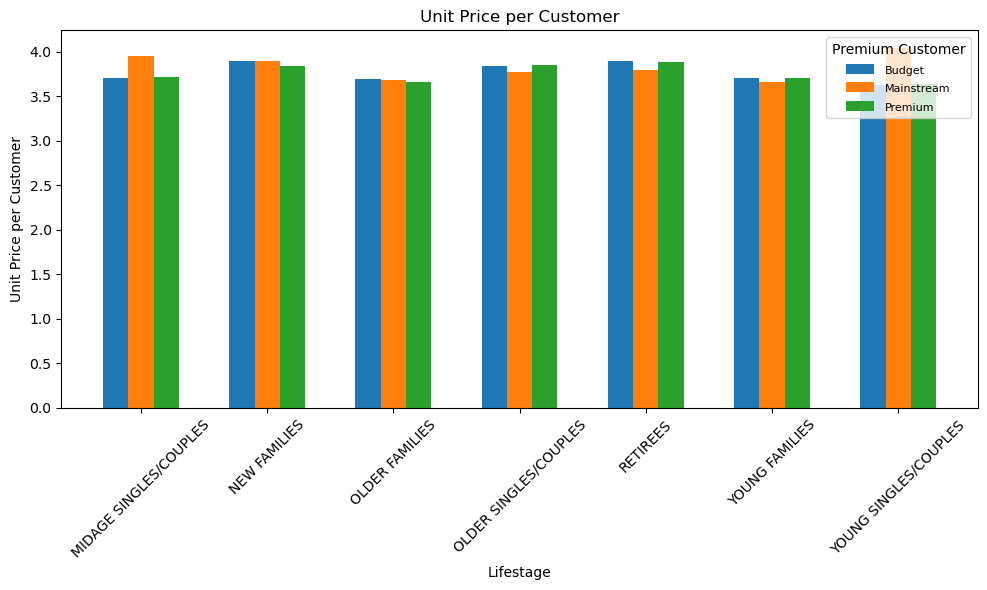

In [68]:
##doggy plot
import numpy as np
import matplotlib.pyplot as plt

lifestages = customer_per_price.index
premium_customers = customer_per_price.columns
unit_prices = customer_per_price.values.T

bar_width = 0.2
x = np.arange(len(lifestages))

fig, ax = plt.subplots(figsize=(10, 6))


for i, premium_customer in enumerate(premium_customers):
    ax.bar(x + i * bar_width, unit_prices[i], bar_width, label=premium_customer)

ax.set_xlabel('Lifestage')
ax.set_ylabel('Unit Price per Customer')
ax.set_title('Unit Price per Customer')
ax.set_xticks(x + bar_width * (len(premium_customers) - 1) / 2)
ax.set_xticklabels(lifestages, rotation=45)
legend = ax.legend(title='Premium Customer', loc='upper right')

for item in legend.get_texts():
    item.set_fontsize(8)  # Adjust the font size as needed
    
plt.tight_layout()
plt.show()

#### Summary: mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

----------------------------------------------------------------------------------------------------

As the difference in average price per unit isn’t large, we can check if this difference is statistically different.

In [61]:
#### Perform an independent t-test between mainstream vs premium and budget midage

from scipy import stats

df_all['Unit_Price'] = df_all['TOT_SALES']/df_all['PROD_QTY']

group1 = df_all[(df_all['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"])) & (df_all['PREMIUM_CUSTOMER'] == "Mainstream")]['Unit_Price']

group2 = df_all[(df_all['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"])) & (df_all['PREMIUM_CUSTOMER'] != "Mainstream")]['Unit_Price']



t_statistic, p_value = stats.ttest_ind(group1, group2)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference.")
# #stats.ttest_rel(df_all.loc[df_all['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"])
#                                                   & df_all['PREMIUM_CUSTOMER']== "Mainstream", 'Unit_Price'],
                                       
#                                       df_all.loc[df_all['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"])
#                                                   & df_all['PREMIUM_CUSTOMER'] != "Mainstream", 'Unit_Price'])
                                       
# print("T-Statistic:", t_statistic)
# print("P-Value:", p_value)
# Mainstream = df_all[df['LIFESTAGE'] == ]
#Other

T-Statistic: 37.83196107667815
P-Value: 2.235645611549355e-309
Reject the null hypothesis: There is a significant difference.


#### Summary: the unit price for mainstream, young and mid-age singles and couples are significantly higher than that of budget or premium, young and midage singles and couples.

#### Overall, mainstream young singles/couples could be the target customer in terms of the above analysis


### What's the target group's preference on the brand?

In [69]:
##brand 


segment1 = df_all[(df_all['LIFESTAGE']== "YOUNG SINGLES/COUPLES") & (df_all['PREMIUM_CUSTOMER']== "Mainstream")]

segment_other = df_all[~((df_all['LIFESTAGE']== "YOUNG SINGLES/COUPLES") & (df_all['PREMIUM_CUSTOMER']== "Mainstream"))]

quantity_segment1 = pd.DataFrame(segment1.groupby("BRAND_NAME")['PROD_QTY'].sum()).reset_index()

quantity_segmentOther = pd.DataFrame(segment_other.groupby("BRAND_NAME")['PROD_QTY'].sum()).reset_index()



In [71]:
##quantity_segment1_by_brand <‐ segment1[, .(targetSegment = sum(PROD_QTY)/quantity_segment1), by = BRAND]

quantity_segmeny1_by_brand = pd.DataFrame(quantity_segment1.groupby('BRAND_NAME').apply(lambda x: x['PROD_QTY'] / sum(quantity_segment1['PROD_QTY'])))

quantity_segmeny1_by_brand = quantity_segmeny1_by_brand.sort_values(by = 'PROD_QTY', ascending=False).reset_index()[['BRAND_NAME', 'PROD_QTY']].rename(columns = {"PROD_QTY" : 'Target_per'})


quantity_segmenyOth_by_brand = pd.DataFrame(quantity_segmentOther.groupby('BRAND_NAME').apply(lambda x: x['PROD_QTY'] / sum(quantity_segmentOther['PROD_QTY'])))

quantity_segmenyOth_by_brand = quantity_segmenyOth_by_brand.sort_values(by = 'PROD_QTY', ascending=False).reset_index()[['BRAND_NAME', 'PROD_QTY']].rename(columns = {"PROD_QTY" : 'Other_per'})




In [72]:
propotion_brand = quantity_segmeny1_by_brand.merge(quantity_segmenyOth_by_brand, left_on = 'BRAND_NAME', right_on = 'BRAND_NAME')
propotion_brand['Difference'] = propotion_brand['Target_per']/ propotion_brand['Other_per']

propotion_brand.sort_values(by = 'Difference', ascending=False)

,BRAND_NAME,Target_per,Other_per,Difference
11,Tyrrells,0.031553,0.025692,1.228095
6,Twisties,0.046184,0.037877,1.219319
1,Doritos,0.122761,0.101075,1.214553
0,Kettle,0.197985,0.165553,1.195897
7,Tostitos,0.045411,0.037978,1.195713
2,Pringles,0.119420,0.100635,1.186670
8,Cobs,0.044638,0.039049,1.143124
4,Infuzions,0.064679,0.057065,1.133435
5,Thins,0.060373,0.056986,1.059423
9,Grain Waves,0.032712,0.031188,1.048873


####  Summary: mainstream young singles/couples are 23% more likely to purchase Tyrrells chips compared to the rest of the population; Mainstream young singles/couples are 56% less likely to purchase Burger Rings compared to the rest of the population

### What's the target group's preference on the package size?

In [71]:
##size
df_all['Pack_Size'] = df_all["PROD_NAME"].str.extract('(\d+)', expand=False)


In [72]:
segmentSize1 = df_all[(df_all['LIFESTAGE']== "YOUNG SINGLES/COUPLES") & (df_all['PREMIUM_CUSTOMER']== "Mainstream")]

segment_SizeOther = df_all[~((df_all['LIFESTAGE']== "YOUNG SINGLES/COUPLES") & (df_all['PREMIUM_CUSTOMER']== "Mainstream"))]

quantity_segmentSize1 = pd.DataFrame(segmentSize1.groupby("Pack_Size")['PROD_QTY'].sum()).reset_index()

quantity_segmentSizeOther = pd.DataFrame(segment_SizeOther.groupby("Pack_Size")['PROD_QTY'].sum()).reset_index()

In [73]:

quantity_segmeny1_by_size = pd.DataFrame(quantity_segmentSize1 .groupby('Pack_Size').apply(lambda x: x['PROD_QTY'] / sum(quantity_segmentSize1 ['PROD_QTY'])))

quantity_segmeny1_by_size = quantity_segmeny1_by_size.sort_values(by = 'PROD_QTY', ascending=False).reset_index()[['Pack_Size', 'PROD_QTY']].rename(columns = {"PROD_QTY" : 'Target_per'})


quantity_segmenyOth_by_size = pd.DataFrame(quantity_segmentSizeOther.groupby('Pack_Size').apply(lambda x: x['PROD_QTY'] / sum(quantity_segmentSizeOther['PROD_QTY'])))

quantity_segmenyOth_by_size = quantity_segmenyOth_by_size.sort_values(by = 'PROD_QTY', ascending=False).reset_index()[['Pack_Size', 'PROD_QTY']].rename(columns = {"PROD_QTY" : 'Other_per'})

In [74]:
propotion_size = quantity_segmeny1_by_size.merge(quantity_segmenyOth_by_size, left_on = 'Pack_Size', right_on = 'Pack_Size')
propotion_size['Difference'] = propotion_size['Target_per']/ propotion_size['Other_per']

propotion_size.sort_values(by = 'Difference', ascending=False)

,Pack_Size,Target_per,Other_per,Difference
8,270,0.031141,0.024219,1.285812
7,380,0.031465,0.024690,1.274398
5,330,0.059959,0.048409,1.238597
2,134,0.116840,0.097118,1.203067
3,110,0.103984,0.086654,1.199992
9,210,0.028494,0.024243,1.175337
10,135,0.014450,0.012619,1.145117
11,250,0.014045,0.012334,1.138685
4,170,0.079028,0.078156,1.011151
0,175,0.249480,0.260572,0.957431


####  Mainstream young singles/couples seemingly are 27% more likely to purchase a 270g pack of chips compared to the rest of the population but let’s dive into what brands sell this pack size.

In [77]:
df_all[df_all['Pack_Size'] == '270']["BRAND_NAME"].unique()

array(['Twisties'], dtype=object)

#### Twisties are the only brand offering 270g packs and so this may instead be reflecting a higher likelihood of purchasing Twisties.

## Conclusion


Sales have primarily been driven by three customer segments: Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees shoppers. The notable increase in chip spending for these segments is attributed to their larger population compared to other buyer groups.

Furthermore, Mainstream - midage and young singles/couples demonstrate a higher willingness to pay more per packet of chips, indicative of impulsive buying behavior.

A particularly noteworthy insight is that Mainstream - young singles and couples are 23% more likely to purchase Tyrrells chips than the rest of the population.

To enhance the category's performance, the Category Manager may consider strategically placing Tyrrells and smaller chip packs in discretionary spaces frequented by young singles and couples. This approach aims to boost visibility and encourage impulse buying behavior among this demographic.
